In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from natsort import natsorted
%matplotlib inline

# files to evaluate
af = pd.read_csv('../data/mar-23-2019-results.csv')

In [3]:
cov = af.groupby(
    by=['Config', 'Domain', 'Problem'])['Plan'].first().groupby(
    by=['Config', 'Domain']).count().unstack('Config').fillna(0)
cov = cov.reindex(columns=natsorted(cov.columns))
cov[['dmtb-ff1-t{}'.format(x) for x in [1] + list(range(10,410,10))]].sum().sort_values()
#cov.style.highlight_max(axis=1, color='yellow')

Config
dmtb-ff1-t1      115.0
dmtb-ff1-t10     116.0
dmtb-ff1-t20     126.0
dmtb-ff1-t30     132.0
dmtb-ff1-t50     134.0
dmtb-ff1-t80     135.0
dmtb-ff1-t150    136.0
dmtb-ff1-t220    136.0
dmtb-ff1-t120    137.0
dmtb-ff1-t340    137.0
dmtb-ff1-t40     137.0
dmtb-ff1-t90     138.0
dmtb-ff1-t170    138.0
dmtb-ff1-t260    138.0
dmtb-ff1-t60     139.0
dmtb-ff1-t230    139.0
dmtb-ff1-t320    139.0
dmtb-ff1-t350    140.0
dmtb-ff1-t310    140.0
dmtb-ff1-t70     140.0
dmtb-ff1-t270    141.0
dmtb-ff1-t380    141.0
dmtb-ff1-t200    141.0
dmtb-ff1-t390    141.0
dmtb-ff1-t210    141.0
dmtb-ff1-t250    142.0
dmtb-ff1-t180    142.0
dmtb-ff1-t140    142.0
dmtb-ff1-t330    143.0
dmtb-ff1-t130    143.0
dmtb-ff1-t360    143.0
dmtb-ff1-t110    144.0
dmtb-ff1-t280    145.0
dmtb-ff1-t290    145.0
dmtb-ff1-t300    145.0
dmtb-ff1-t240    146.0
dmtb-ff1-t370    146.0
dmtb-ff1-t100    147.0
dmtb-ff1-t160    147.0
dmtb-ff1-t190    148.0
dmtb-ff1-t400    148.0
dtype: float64

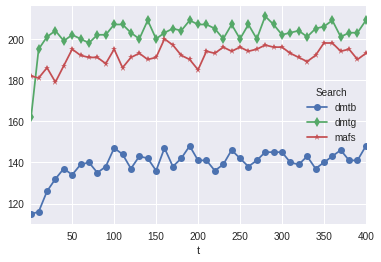

In [4]:
cov = af.groupby(
    by=['Domain', 'Problem', 'Config']).first().groupby(
    by=['t', 'Search']).Plan.count().unstack('Search')
#cov.style.highlight_max(axis=1)
cov.plot(style=['o-', 'd-', '*-'])

/home/tim/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


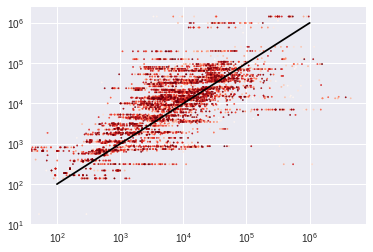

In [21]:
from matplotlib import cm

cmp = af.groupby(
    by=['Domain', 'Problem', 'Config']).agg({
        'Expansions': 'sum',
        'MessagesOut': 'sum',
        'Cost': 'min',
        'Seconds': 'min',
        't': 'first',
        'Search': 'first',
    }).unstack('Config')

configs=['dmtg-ff1-t{}'.format(i) for i in [1] + list(range(10,410,10))]
versus='mafs-ff1-t1'
colors = cm.get_cmap('Reds')
get_color = lambda x: colors(x/400.0)

f, ax = plt.subplots()
for c in configs:
    ax.scatter(
        x=cmp.Expansions[c], 
        y=cmp.Expansions[versus], 
        c=get_color(cmp.t[c]),
        s=2,
    )

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot([1e2,1e6], [1e2,1e6], c='black')

In [5]:
from scipy import stats

configs = [
    'mafs-ff1-t1', 
    'dmtg-ff1-t1', 
    'dmtb-ff1-t1'
]
mut = af.groupby(
    by=['Domain', 'Problem', 'Config']).agg({
        'Expansions': 'sum',
        'MessagesOut': 'sum',
        'Cost': 'min',
        'Seconds': 'max',
        't': 'first',
        'Search': 'first',
    }).unstack('Config')
mut = mut[~(mut.Expansions[configs].isnull().any(axis=1))]
mut = mut.groupby(by='Domain').mean().round(1).Expansions
print(stats.gmean(mut['dmtg-ff1-t1'] / mut['mafs-ff1-t1']), 
      stats.gmean(mut['dmtb-ff1-t1'] / mut['mafs-ff1-t1']))

0.649691273617 5.69257338053


In [6]:
configs = [
    'mafs-ff1-t1', 
    #'dmtg-ff1-t1', 
    #'dmtb-ff1-t1',
    #'mafs-ff1-t100',
    #'dmtg-ff1-t100',
    #'dmtb-ff1-t100',
    'dmtg-ff1-t280',
    'mafs-ff1-t160',
    #'dmtb-ff1-t400',
]

con = af[af.Domain != 'productionsite'].groupby(
    by=['Domain', 'Problem', 'Config']).agg({
        'Expansions': 'sum',
        'MessagesOut': 'sum',
        'Cost': 'min',
        'Seconds': 'max',
        't': 'first',
        'Search': 'first',
    }).unstack('Config')
con = con[~(con.Seconds[configs].isnull().all(axis=1))]
(con.Seconds[configs] < 600).any(axis = 1).value_counts()

True     192
False      1
dtype: int64

In [29]:
af[(af.Domain == 'productionsite') & (af.Config == 'mafs-ff1-t1')].groupby(by=['Problem', 'AgentID']).max().unstack('AgentID')

Unnamed: 0                         Unnamed: 0.1                  \
AgentID           0       1       2       3            0       1       2   
Problem                                                                    
4-10-1-1      84999   64335  115783   70924        84999   64335  115783   
4-10-2-2      65809  102774   89605   84220        65809  102774   89605   
4-10-3-3     117671   65938   84868   97773       117671   65938   84868   
4-10-4-4      78884  100262   70444   78794        78884  100262   70444   
4-4-1-1       81091   97522   99406   77696        81091   97522   99406   
4-4-2-2       66355   70159  112201  110699        66355   70159  112201   
4-4-3-3      108312   73220  112572   86227       108312   73220  112572   
4-4-4-4       78896  114926   88429   82373        78896  114926   88429   
4-4-5-5       78967   76875   98003   65234        78967   76875   98003   
4-4-6-6      117368   95403   84052   80868       117368   95403   84052   
4-5-1-1      115074  112353  103162   98964       115074  112353  103162   
4-5-2-2      115994   96787   91349  109001       115994   96787   91349   
4-5-3-3       74815   92931  117386   72808        74815   92931  117386   
4-5-4-4       83272   73176   98600  100656        83272   73176   98600   
4-5-5-5      114944  117731  115785   87313       114944  117731  115785   
4-5-6-6      117324  114984   79965   87242       117324  114984   79965   
4-6-1-1       98349   61814   81601   75532        98349   61814   81601   
4-6-2-2       95102  105584   83960  108850        95102  105584   83960   
4-6-3-3       95454   74959   86510   69925        95454   74959   86510   
4-6-4-4       77668   72091  116272   93229        77668   72091  116272   
4-6-5-5       96006  112368   95117  109075        96006  112368   95117   
4-6-6-6       76524   64517  118146   76243        76524   64517  118146   
4-7-1-1       65775   75527   61865  101953        65775   75527   61865   
4-7-2-2      113653   86057   83506  104712       113653   86057   83506   
4-7-3-3      106906   65373   81771   84384       106906   65373   81771   
4-7-4-4       73798  102164   77367  109956        73798  102164   77367   
4-7-6-6      112325  114358  116300  116311       112325  114358  116300   
4-8-1-1      104647   76090   94013  102965       104647   76090   94013   
4-8-2-2      104252   78847   82943   88708       104252   78847   82943   
4-8-3-3       76743   76120   81374   83057        76743   76120   81374   
4-8-5-5      109115   67624  102362   99648       109115   67624  102362   
4-9-1-1       88178   88104   74293   91134        88178   88104   74293   
4-9-2-2       61874   92097   91044  106215        61874   92097   91044   
4-9-3-3       84801   94092   97655   95707        84801   94092   97655   
4-9-4-4      109836   63039   97619   81866       109836   63039   97619   

                       Plan             ...        Config               t     \
AgentID        3          0          1  ...             2            3  0  1   
Problem                                 ...                                    
4-10-1-1   70924      3-679      3-679  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-10-2-2   84220     0-2295     0-2295  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-10-3-3   97773    1-90103    1-90103  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-10-4-4   78794  0-1865272  0-1865272  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-1-1    77696       3-74       3-74  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-2-2   110699      2-293      2-293  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-3-3    86227     0-2632     0-2632  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-4-4    82373     0-1694     0-1694  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-5-5    65234   2-144502   2-144502  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-4-6-6    80868    0-20111    0-20111  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   
4-5-1-1    98964      3-119      3-119  ...   mafs-ff1-t1  mafs-ff1-t1  1  1   


In [22]:
cov = af.groupby(
    by=['Config', 'Domain', 'Problem'])['Plan'].first().groupby(
    by=['Config', 'Domain']).count().unstack('Config').fillna(0)
cov = cov.reindex(columns=natsorted(cov.columns))
cov.ix['productionsite']

/home/tim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


Config
dmtb-ff1-t1      20.0
dmtb-ff1-t10     21.0
dmtb-ff1-t20     25.0
dmtb-ff1-t30     26.0
dmtb-ff1-t40     24.0
dmtb-ff1-t50     23.0
dmtb-ff1-t60     26.0
dmtb-ff1-t70     25.0
dmtb-ff1-t80     24.0
dmtb-ff1-t90     25.0
dmtb-ff1-t100    26.0
dmtb-ff1-t110    25.0
dmtb-ff1-t120    25.0
dmtb-ff1-t130    25.0
dmtb-ff1-t140    25.0
dmtb-ff1-t150    23.0
dmtb-ff1-t160    26.0
dmtb-ff1-t170    23.0
dmtb-ff1-t180    26.0
dmtb-ff1-t190    25.0
dmtb-ff1-t200    25.0
dmtb-ff1-t210    26.0
dmtb-ff1-t220    25.0
dmtb-ff1-t230    26.0
dmtb-ff1-t240    24.0
dmtb-ff1-t250    24.0
dmtb-ff1-t260    25.0
dmtb-ff1-t270    25.0
dmtb-ff1-t280    24.0
dmtb-ff1-t290    24.0
                 ... 
mafs-ff1-t110    18.0
mafs-ff1-t120    19.0
mafs-ff1-t130    18.0
mafs-ff1-t140    19.0
mafs-ff1-t150    17.0
mafs-ff1-t160    18.0
mafs-ff1-t170    22.0
mafs-ff1-t180    20.0
mafs-ff1-t190    18.0
mafs-ff1-t200    19.0
mafs-ff1-t210    19.0
mafs-ff1-t220    18.0
mafs-ff1-t230    19.0
mafs-ff1-t240    18.0
maf